## Naive Bayes

This is a public set of comments collected for spam research. It has five datasets composed of 1,956 real messages extracted from five videos. These five videos are popular pop songs that were among the 10 most viewed in the collection period.

#### Attributes:

COMMENT_ID: Unique ID representing the comment

AUTHOR: Author ID

DATE: Date the comment is posted

CONTENT: The comment

TAG: Attribute Explained

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [4]:
# training datasets
df1 = pd.read_csv(r"C:\Users\stlp\Downloads\Youtube01-Psy.csv")
df2 = pd.read_csv(r"C:\Users\stlp\Downloads\Youtube05-Shakira.csv")
df3 = pd.read_csv(r"C:\Users\stlp\Downloads\Youtube04-Eminem.csv")
df4 = pd.read_csv(r"C:\Users\stlp\Downloads\Youtube03-LMFAO.csv")
# test dataset
df5 = pd.read_csv(r"C:\Users\stlp\Downloads\Youtube02-KatyPerry.csv")

In [5]:
data = pd.concat([df1, df2, df3, df4], axis = 0).reset_index()

In [6]:
data.head()

,index,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1


In [17]:
x_train = data['CONTENT']
y_train = data['CLASS']

x_test = df5['CONTENT']
y_test = df5['CLASS']

In [66]:
# multinomial Naive Bayes text classification function
# vectorize comments 
# train model
# print accuracy and classification report
# plot confusion matrix
# return predictions for test data
def multinomial_nb_spam_classification(x_train, y_train, x_test, y_test): 
    # vectorize comments into numerical frequency
    vectorizer = TfidfVectorizer()
    x_train_vec = vectorizer.fit_transform(x_train)
    x_test_vec = vectorizer.transform(x_test)

    # train naive bayes model
    model = MultinomialNB().fit(x_train_vec, y_train)

    # predictions
    y_pred = model.predict(x_test_vec)

    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    
    print("Confusion Matrix:\n")
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])
    cm_display.plot()
    plt.show()

    return y_pred

Accuracy: 0.88
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.82      0.87       175
           1       0.84      0.94      0.89       175

    accuracy                           0.88       350
   macro avg       0.89      0.88      0.88       350
weighted avg       0.89      0.88      0.88       350

Confusion Matrix:

[[144  31]
 [ 11 164]]


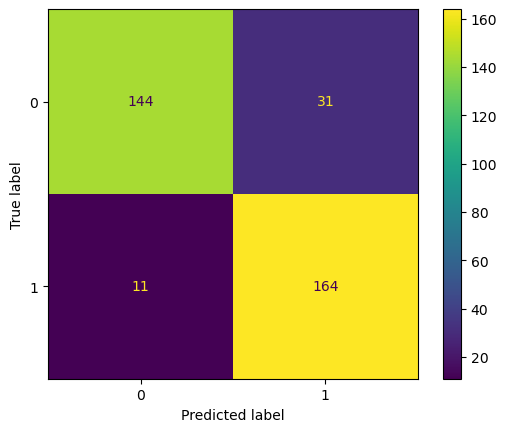

In [68]:
y_pred = multinomial_nb_spam_classification(x_train, y_train, x_test, y_test)

In [59]:
# text classification recommendations function
# recommends flagging based on predictions 
# returns recommendations
def recommendations(comment, y_pred):
    recommendations = []
    for c, pred in zip(comment, y_pred):
        if pred == 1:
            action = "Flag"
        else:
            action = "None"
        recommendations.append(action)
    
    return recommendations

In [55]:
recs = recommendations(df5['CONTENT'], y_pred)
df5['RECOMMENDATIONS'] = recs
df5

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS,RECOMMENDATIONS
0,z12pgdhovmrktzm3i23es5d5junftft3f,lekanaVEVO1,2014-07-22T15:27:50,i love this so much. AND also I Generate Free ...,1,Flag
1,z13yx345uxepetggz04ci5rjcxeohzlrtf4,Pyunghee,2014-07-27T01:57:16,http://www.billboard.com/articles/columns/pop-...,1,Flag
2,z12lsjvi3wa5x1vwh04cibeaqnzrevxajw00k,Erica Ross,2014-07-27T02:51:43,Hey guys! Please join me in my fight to help a...,1,Flag
3,z13jcjuovxbwfr0ge04cev2ipsjdfdurwck,Aviel Haimov,2014-08-01T12:27:48,http://psnboss.com/?ref=2tGgp3pV6L this is the...,1,Flag
4,z13qybua2yfydzxzj04cgfpqdt2syfx53ms0k,John Bello,2014-08-01T21:04:03,Hey everyone. Watch this trailer!!!!!!!! http...,1,Flag
...,...,...,...,...,...,...
345,z12sjp3zgtqnvlysj23zuxxaolrvd1oj504,Kacy Cluley,2015-06-05T18:59:52,This song means so much to me thank you soooo...,0,None
346,z132enrpoy35yxpoe04cjr4zur3jvbyq3xo0k,Kasia Fabisiewicz,2015-06-05T19:02:05,&lt;3﻿,0,None
347,z132jbmxfqm4fjysg23nwjfb2mv2vxnua,Decio Alves Martins,2015-06-05T19:29:20,"KATY PERRY, I AM THE ""DÉCIO CABELO"", ""DECIO HA...",1,Flag
348,z12cdlswetvnejcri04cex0jfwy2u3tzj54,Rafi Hossain,2015-06-05T19:55:08,Honestly speaking except taylor swift and adel...,0,None
